In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv('IMDB.csv')

In [4]:
df.sentiment.value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [5]:
# cheacking the null values
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [6]:
# spliting the data into independent and dependent features
x=df['review']
y=df['sentiment']

In [7]:
x.shape

(50000,)

In [8]:
import re
from tqdm import tqdm
import nltk
#nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
corpus=[]
for i in tqdm(range(len(x))):
    review=re.sub(r"http\S+", "", x[i])
    review=re.sub(r"[^a-zA-Z]",' ',review)
    review=review.lower()
    review=review.split()
    review=[lemmatizer.lemmatize(x) for x in review if not x in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)
    


  1%|▍                                                                           | 257/50000 [00:23<1:16:33, 10.83it/s]


KeyboardInterrupt: 

In [15]:
len(corpus)

50000

In [16]:
# importing tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
X=tf.fit_transform(corpus).toarray()

In [17]:

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.25,random_state=42)

In [18]:
# now we importing naive_bayes model
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
nvb=MultinomialNB()
nvb.fit(xtrain,ytrain)
pred=nvb.predict(xtest)
acc=accuracy_score(ytest,pred)*float(100)
acc

86.584

In [1]:
nvb.save('C:\\Users\\user\\tfidfnaive.h5')


NameError: name 'nvb' is not defined

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
svm_model = SVC()
svm_model.fit(xtrain, ytrain)

# Make predictions on the test set
y_pred = svm_model.predict(xtest)

# Evaluate the model
accuracy = accuracy_score(ytest, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

classification_rep = classification_report(ytest, y_pred)
print('Classification Report:\n', classification_rep)


In [27]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(ytest, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

classification_rep = classification_report(y_val, y_pred)
print('Classification Report:\n', classification_rep)


NameError: name 'y_pred' is not defined

Confusion Matrix:
[[5436  721]
 [ 956 5387]]


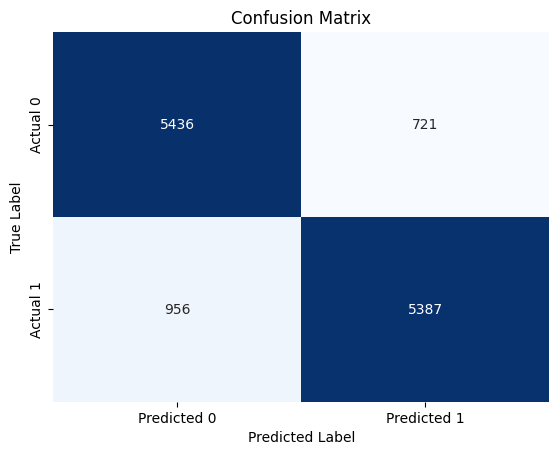

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a confusion matrix
conf_matrix = confusion_matrix(ytest, pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [21]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
probs = nvb.predict_proba(xtest)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(ytest, probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

ValueError: y_true takes value in {'negative', 'positive'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

In [24]:
probs = nvb.predict_proba(xtest)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(ytest, probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

ValueError: y should be a 1d array, got an array of shape (12500, 2) instead.

In [25]:
from sklearn.metrics import confusion_matrix

# Assuming ytest and pred are defined

# Generate a confusion matrix
conf_matrix = confusion_matrix(ytest, pred)

# Print a smaller version of the confusion matrix
print("Confusion Matrix:")
print(f"TP: {conf_matrix[1, 1]}, FP: {conf_matrix[0, 1]}")
print(f"FN: {conf_matrix[1, 0]}, TN: {conf_matrix[0, 0]}")

SyntaxError: invalid non-printable character U+00A0 (3841323061.py, line 1)

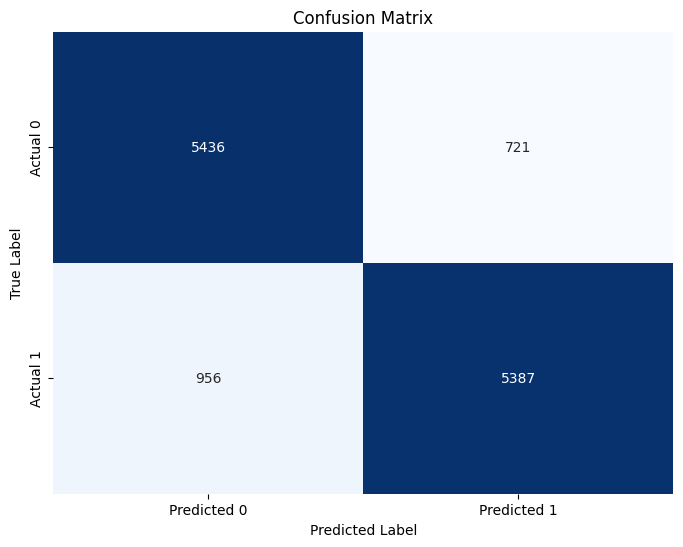

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming ytest and pred are defined

# Generate a confusion matrix
conf_matrix = confusion_matrix(ytest, pred)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()